In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#sys.path.insert(0, '/Users/ammar.tareen/Desktop/Research_projects/mavenn2/')
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re
import tensorflow

%matplotlib inline

### Read replicate library 1 and 2 into a concatenated dataframe

In [2]:
data_df_full_lib_1 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
y_cols = list(data_df_full_lib_1.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
cols.insert(1,'barcodes')
data_df_lib_1 = data_df_full_lib_1[cols].copy()

data_df_full_lib_2 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib2.csv')
y_cols = list(data_df_full_lib_2.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
cols.insert(1,'barcodes')
data_df_lib_2 = data_df_full_lib_2[cols].copy()

data_df = pd.concat([data_df_lib_1,data_df_lib_2]).reset_index(drop=True).copy()
data_df.head()

,x,barcodes,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,AAAAAAAAAATTGTAA,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,AAAAAAAAACTTAAAT,0,0,0,0,0,0,0,0,...,0,0,21,0,0,0,17,0,0,0
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,AAAAAAAAACTTCAAT,6,35,162,4,24,85,80,30,...,37,0,151,4,0,0,154,19,0,0
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,AAAAAAAACAAGCAGA,0,1,3,439,1,0,14,307,...,82,0,180,12,0,12,306,20,0,0
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,AAAAAAAACAATATAA,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
def compute_mean_bin_per_ACE2_conc(df, y_cols=y_cols):
    
    """
    Helper function to compute mean bin from Titeseq counts
    """
    mean_bin_list = []
    for idx,conc_index in enumerate(np.arange(1,16+1,1)):

        # this is a concentration string to specific numbers of cells sorted in each 
        # of the 4 bins at a particular concentrations
        conc_string = f"{conc_index:02d}"

        df_conc = df[[f'TiteSeq_{conc_string}_bin1',
                      f'TiteSeq_{conc_string}_bin2',
                      f'TiteSeq_{conc_string}_bin3',
                      f'TiteSeq_{conc_string}_bin4']]

        # compute n across the 4 bins for a given concentration of ACE2
        n = df_conc.sum(axis=0)
        
        if sum([n_i for n_i in n]) !=0:
            mean_bin = sum([i*n_i for i,n_i in enumerate(n,start=1)])/sum([n_i for n_i in n])
        else:
            mean_bin = 0


        #print(cs[idx],conc_index,mean_bin)
        mean_bin_list.append(mean_bin)
    return mean_bin_list

The following block runs the mean bin function above for all sequences, saves the output to file

In [4]:
# take a while ~ 30 minutes
# mean_bin_values = np.zeros(shape=(data_df.shape[0],16))
# for idx, sequence in enumerate(data_df['x']):
    
#     if idx%20000==0:
#         print(idx)
#     temp_mean_bin = compute_mean_bin_per_ACE2_conc(data_df[data_df['x']==sequence])
#     mean_bin_values[idx] = temp_mean_bin
    
# pd.concat([data_df,pd.DataFrame(mean_bin_values)],axis=1).to_csv('ace2rbd_mean_bin_vals.csv.gz',index=False)    

In [5]:
mean_bin_df = pd.read_csv('ace2rbd_mean_bin_vals.csv.gz')
mean_bin_df

,x,barcodes,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,...,6,7,8,9,10,11,12,13,14,15
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,AAAAAAAAAATTGTAA,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,AAAAAAAAACTTAAAT,0,0,0,0,0,0,0,0,...,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.538462,1.000000,1.000000,1.000000
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,AAAAAAAAACTTCAAT,6,35,162,4,24,85,80,30,...,1.489691,1.445070,1.042017,1.352000,1.178988,1.161290,1.052288,1.493827,1.025806,1.109827
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,AAAAAAAACAAGCAGA,0,1,3,439,1,0,14,307,...,3.791152,3.601711,3.025800,2.174912,1.650000,1.416753,1.226493,1.207234,1.531500,1.058196
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,AAAAAAAACAATATAA,0,0,3,0,0,0,0,0,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184245,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,TTTTTTTAAGTCCCAA,0,0,0,239,0,0,1,167,...,4.000000,3.944915,3.054187,2.927083,1.842105,2.190244,1.134615,1.009174,1.019920,1.124402
184246,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,TTTTTTTACAGTCTTG,0,29,211,45,0,44,244,19,...,1.343604,1.397123,1.190528,1.144487,1.180049,2.639422,1.079094,1.137730,1.098607,1.186139
184247,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,TTTTTTTACCAGACTG,0,24,394,13,0,28,389,2,...,2.601240,2.082228,1.332288,1.329588,1.080709,1.136646,1.084282,1.047393,1.065060,1.098522
184248,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,TTTTTTTCTTTAAAAA,49,17,1,0,19,4,0,5,...,1.148760,1.394737,2.090361,1.414815,1.047337,1.084211,1.038462,1.089552,1.177570,1.040323


In [6]:
# a list of concentration from Star et al. 2020.
cs = [0,10**(-13),10**(-12.5),
     10**(-12),10**(-11.5),
     10**(-11),10**(-10.5),
     10**(-10),10**(-9.5),
     10**(-9),10**(-8.5),
     10**(-8),10**(-7.5),
     10**(-7),10**(-6.5),
     10**(-6)]

In [7]:
mean_bin_df[mean_bin_df.columns[66:]]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,3.636364,0.000000,1.000000,3.470588,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.538462,1.000000,1.000000,1.000000
2,2.792271,2.529680,2.648276,2.798122,2.519380,2.215686,1.489691,1.445070,1.042017,1.352000,1.178988,1.161290,1.052288,1.493827,1.025806,1.109827
3,3.953554,3.904607,3.812255,3.739974,3.887789,3.798417,3.791152,3.601711,3.025800,2.174912,1.650000,1.416753,1.226493,1.207234,1.531500,1.058196
4,3.000000,0.000000,1.000000,1.166667,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184245,4.000000,3.994048,4.000000,4.000000,3.971429,3.969163,4.000000,3.944915,3.054187,2.927083,1.842105,2.190244,1.134615,1.009174,1.019920,1.124402
184246,2.964300,3.024105,2.917547,2.921924,2.741532,1.648459,1.343604,1.397123,1.190528,1.144487,1.180049,2.639422,1.079094,1.137730,1.098607,1.186139
184247,2.974478,2.937947,3.051020,2.988332,3.122271,2.523952,2.601240,2.082228,1.332288,1.329588,1.080709,1.136646,1.084282,1.047393,1.065060,1.098522
184248,1.283582,1.678571,2.070588,1.067308,1.222222,1.050000,1.148760,1.394737,2.090361,1.414815,1.047337,1.084211,1.038462,1.089552,1.177570,1.040323


Read Bloom binding Kds from file

In [8]:
bloom_binding_Kds_df = pd.read_csv('binding_Kds.txt')
bloom_binding_Kds_df=bloom_binding_Kds_df.rename(columns = {'barcode':'barcodes'})
bloom_binding_Kds_dropped_nans_df = bloom_binding_Kds_df[['barcodes','response','baseline','log10Ka']].dropna().merge(pd.DataFrame(bloom_binding_Kds_df['aa_substitutions'].fillna('WT')),right_index=True,left_index=True,how='inner').reset_index(drop=True).copy()
bloom_binding_Kds_dropped_nans_df


,barcodes,response,baseline,log10Ka,aa_substitutions
0,AAAAAAAAACTTCAAT,1.64,1.13,8.72,A22C R127G E141D L188V
1,AAAAAAAACAAGCAGA,2.87,1.01,10.35,N13F
2,AAAAAAAACAGGTTGC,1.50,1.15,6.00,V71K P149L N157T
3,AAAAAAAACATTAAAT,2.64,1.09,10.15,A18V T148S H189Y
4,AAAAAAAACCTTACAA,2.00,1.11,9.61,T63D A89N
...,...,...,...,...,...
146432,TTTTTTTACAGTCTTG,2.00,1.06,8.18,Y165S
146433,TTTTTTTACCAGACTG,1.93,1.06,9.46,G83V D98L
146434,TTTTTTTCTTTAAAAA,1.50,1.26,6.00,V71H S147Q
146435,TTTTTTTGAAGCCCCA,2.85,1.11,10.94,WT


In [9]:
merged_data_df = data_df.merge(bloom_binding_Kds_dropped_nans_df,on='barcodes',how='inner').reset_index(drop=True).copy()


In [10]:
merged_data_df2 = merged_data_df[['x','barcodes','response','baseline','log10Ka','aa_substitutions']].merge(mean_bin_df,on='barcodes',how='inner').copy()


In [11]:
merged_data_df3 = merged_data_df2.reset_index(drop=True).copy()
merged_data_df3

,x_x,barcodes,response,baseline,log10Ka,aa_substitutions,x_y,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,...,6,7,8,9,10,11,12,13,14,15
0,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,AAAAAAAAACTTCAAT,1.64,1.13,8.72,A22C R127G E141D L188V,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,6,35,162,...,1.489691,1.445070,1.042017,1.352000,1.178988,1.161290,1.052288,1.493827,1.025806,1.109827
1,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,AAAAAAAACAAGCAGA,2.87,1.01,10.35,N13F,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,1,3,...,3.791152,3.601711,3.025800,2.174912,1.650000,1.416753,1.226493,1.207234,1.531500,1.058196
2,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,AAAAAAAACAGGTTGC,1.50,1.15,6.00,V71K P149L N157T,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,39,7,0,...,1.265193,1.078740,1.130952,1.052980,1.077922,1.000000,1.029126,1.073171,1.027778,2.804241
3,NITNLCPFGEVFNATRFVSVYAWNRKRISNCVADYSVLYNSASFST...,AAAAAAAACATTAAAT,2.64,1.09,10.15,A18V T148S H189Y,NITNLCPFGEVFNATRFVSVYAWNRKRISNCVADYSVLYNSASFST...,1,1,24,...,3.181347,3.194203,2.812500,1.585812,1.274953,1.397816,1.165909,1.273458,1.594132,1.029126
4,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,AAAAAAAACCTTACAA,2.00,1.11,9.61,T63D A89N,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,1,0,59,...,2.789474,2.235294,1.892857,1.238095,1.442623,1.102564,1.107143,1.183333,1.000000,1.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136387,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,TTTTTTTAAGTCCCAA,2.95,1.05,10.59,Y66L G174N,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,...,4.000000,3.944915,3.054187,2.927083,1.842105,2.190244,1.134615,1.009174,1.019920,1.124402
136388,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,TTTTTTTACAGTCTTG,2.00,1.06,8.18,Y165S,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,29,211,...,1.343604,1.397123,1.190528,1.144487,1.180049,2.639422,1.079094,1.137730,1.098607,1.186139
136389,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,TTTTTTTACCAGACTG,1.93,1.06,9.46,G83V D98L,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,24,394,...,2.601240,2.082228,1.332288,1.329588,1.080709,1.136646,1.084282,1.047393,1.065060,1.098522
136390,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,TTTTTTTCTTTAAAAA,1.50,1.26,6.00,V71H S147Q,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,49,17,1,...,1.148760,1.394737,2.090361,1.414815,1.047337,1.084211,1.038462,1.089552,1.177570,1.040323


In [12]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.constraints import non_neg as nonneg
import tensorflow as tf

import tensorflow.keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Activation, Input, Lambda, Concatenate,Flatten
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras import callbacks
from tensorflow.keras.initializers import Constant

from tensorflow.keras.models import load_model

In [13]:
from tensorflow.keras.constraints import MinMaxNorm

In [14]:
# test example to try out hashing in tensorflow

# define an array of constants
params = tf.constant([1, 2.0, 3,4.5,6])

print(params[3].numpy())
print(tf.gather(params, 3))
print(tf.gather(params, 3).numpy())


4.5
tf.Tensor(4.5, shape=(), dtype=float32)
4.5


2022-12-02 15:13:04.802266: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
class HashGPMAP_Layer(tensorflow.keras.layers.Layer):

    def __init__(self, 
                 cs,
                 data_df_shape,
                 *args, **kwargs):
        """Construct layer instance."""
        
        # set attributes
        self.cs= cs
        self.data_df_shape = data_df_shape
        
        super().__init__(*args, **kwargs)        
        
    def build(self, input_shape):
        
        # These are the weights for the Hill equation 
        # the initial values are set based on the sklearn fits
        # a refers to the amplitude parameter in the Hill equation
        self.a = self.add_weight(name='a',
                                       shape=(self.data_df_shape,),
                                       initializer=Constant(3.5),
                                       trainable=True)

        # b is the backgroun in the Hill equation
        self.b = self.add_weight(name='b',
                                       shape=(self.data_df_shape,),
                                       initializer=Constant(0.5),
                                       trainable=True)
        
        self.kd = self.add_weight(name='kd',
                                       shape=(self.data_df_shape,),
                                       initializer=Constant(10**(-10)),
                                       #constraint=MinMaxNorm(0.0,1e-6),
                                       trainable=True)



    def call(self, inputs):
        
        print('inputs shape: ',inputs.shape)
        # NEEDS HASH HERE. E.G., for input-1, weights are self.a[1], self.b[1], etc. 
        # something like self.a[inputs], self.b[inputs]
        
        #self.a = tf.reshape(self.a, [-1, 1])
        inputs = tf.cast(inputs, dtype=tf.int32)
        print('Inputs shape',inputs.shape)
        print('self.a: ',tf.gather(self.a,inputs))
        
        print('cs',cs)
        
        a_hash = tf.gather(self.a,inputs)
        b_hash = tf.gather(self.b,inputs)
        kd_hash = tf.gather(self.kd,inputs)
        
        mean_bin = (a_hash * cs) / (cs + kd_hash) + b_hash
        
        print('mean_bin shape',mean_bin.shape)
        #return tf.matmul(inputs, self.w) + self.b
        return mean_bin

### Define hashgpmap model

In [16]:
input_to_model = mean_bin_df.index.values
def get_hashgpmap_model(df_length):

    inputTensor = Input((1), name='Input_layer')
    hashgpmap_layer = HashGPMAP_Layer(cs,df_length)(inputTensor)
    model = Model(inputTensor,hashgpmap_layer)
    return model

### Input and output for model

In [17]:
merged_data_df3[merged_data_df3.columns[71:]]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2.792271,2.529680,2.648276,2.798122,2.519380,2.215686,1.489691,1.445070,1.042017,1.352000,1.178988,1.161290,1.052288,1.493827,1.025806,1.109827
1,3.953554,3.904607,3.812255,3.739974,3.887789,3.798417,3.791152,3.601711,3.025800,2.174912,1.650000,1.416753,1.226493,1.207234,1.531500,1.058196
2,1.326531,1.455446,1.590062,1.224490,1.204082,1.066038,1.265193,1.078740,1.130952,1.052980,1.077922,1.000000,1.029126,1.073171,1.027778,2.804241
3,3.756048,3.919137,3.611940,3.641161,3.762357,3.575080,3.181347,3.194203,2.812500,1.585812,1.274953,1.397816,1.165909,1.273458,1.594132,1.029126
4,3.074627,3.237500,3.388889,3.018519,3.073171,2.333333,2.789474,2.235294,1.892857,1.238095,1.442623,1.102564,1.107143,1.183333,1.000000,1.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136387,4.000000,3.994048,4.000000,4.000000,3.971429,3.969163,4.000000,3.944915,3.054187,2.927083,1.842105,2.190244,1.134615,1.009174,1.019920,1.124402
136388,2.964300,3.024105,2.917547,2.921924,2.741532,1.648459,1.343604,1.397123,1.190528,1.144487,1.180049,2.639422,1.079094,1.137730,1.098607,1.186139
136389,2.974478,2.937947,3.051020,2.988332,3.122271,2.523952,2.601240,2.082228,1.332288,1.329588,1.080709,1.136646,1.084282,1.047393,1.065060,1.098522
136390,1.283582,1.678571,2.070588,1.067308,1.222222,1.050000,1.148760,1.394737,2.090361,1.414815,1.047337,1.084211,1.038462,1.089552,1.177570,1.040323


In [18]:
input_to_model = merged_data_df3.index.values
y_values = merged_data_df3[merged_data_df3.columns[71:]].values
df_length = len(merged_data_df3)

model = get_hashgpmap_model(df_length)
model.summary()

inputs shape:  (None, 1)
Inputs shape (None, 1)
self.a:  Tensor("hash_gpmap__layer/Identity:0", shape=(None, 1), dtype=float32)
cs [0, 1e-13, 3.162277660168379e-13, 1e-12, 3.1622776601683794e-12, 1e-11, 3.1622776601683794e-11, 1e-10, 3.1622776601683795e-10, 1e-09, 3.1622776601683795e-09, 1e-08, 3.162277660168379e-08, 1e-07, 3.162277660168379e-07, 1e-06]
mean_bin shape (None, 16)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 hash_gpmap__layer (HashGPMA  (None, 16)               409176    
 P_Layer)                                                        
                                                                 
Total params: 409,176
Trainable params: 409,176
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.weights

[<tf.Variable 'hash_gpmap__layer/a:0' shape=(136392,) dtype=float32, numpy=array([3.5, 3.5, 3.5, ..., 3.5, 3.5, 3.5], dtype=float32)>,
 <tf.Variable 'hash_gpmap__layer/b:0' shape=(136392,) dtype=float32, numpy=array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5], dtype=float32)>,
 <tf.Variable 'hash_gpmap__layer/kd:0' shape=(136392,) dtype=float32, numpy=array([1.e-10, 1.e-10, 1.e-10, ..., 1.e-10, 1.e-10, 1.e-10], dtype=float32)>]

In [20]:
y_values.shape

(136392, 16)

In [21]:
input_to_model

array([     0,      1,      2, ..., 136389, 136390, 136391])

In [22]:
model.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.005))
#model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.005))

In [23]:
a_reprod_notrain = np.squeeze(model.layers[1].get_weights())[0].copy()
b_reprod_notrain = np.squeeze(model.layers[1].get_weights())[1].copy()
kd_reprod_notrain = np.squeeze(model.layers[1].get_weights())[2].copy()

In [24]:
history = model.fit(input_to_model, 
                    y_values, validation_split=0.0, 
                    epochs=25, verbose=1) 


Epoch 1/25
inputs shape:  (None, 1)
Inputs shape (None, 1)
self.a:  Tensor("model/hash_gpmap__layer/Identity:0", shape=(None, 1), dtype=float32)
cs [0, 1e-13, 3.162277660168379e-13, 1e-12, 3.1622776601683794e-12, 1e-11, 3.1622776601683794e-11, 1e-10, 3.1622776601683795e-10, 1e-09, 3.1622776601683795e-09, 1e-08, 3.162277660168379e-08, 1e-07, 3.162277660168379e-07, 1e-06]
mean_bin shape (None, 16)
inputs shape:  (None, 1)
Inputs shape (None, 1)
self.a:  Tensor("model/hash_gpmap__layer/Identity:0", shape=(None, 1), dtype=float32)
cs [0, 1e-13, 3.162277660168379e-13, 1e-12, 3.1622776601683794e-12, 1e-11, 3.1622776601683794e-11, 1e-10, 3.1622776601683795e-10, 1e-09, 3.1622776601683795e-09, 1e-08, 3.162277660168379e-08, 1e-07, 3.162277660168379e-07, 1e-06]
mean_bin shape (None, 16)
4263/4263 [==============================] - 9s 2ms/step - loss: 5.5959
Epoch 2/25
4263/4263 [==============================] - 8s 2ms/step - loss: 3.2743
Epoch 3/25
4263/4263 [==============================] - 8s

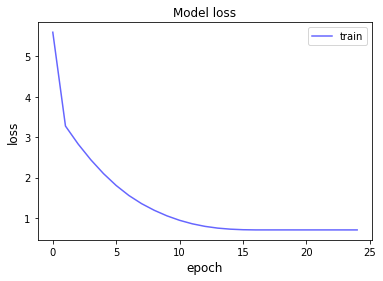

In [25]:
plt.plot(history.history['loss'],color='blue',alpha=0.6)

plt.title('Model loss',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.xlabel('epoch',fontsize=12)
plt.legend(['train'])
plt.show()

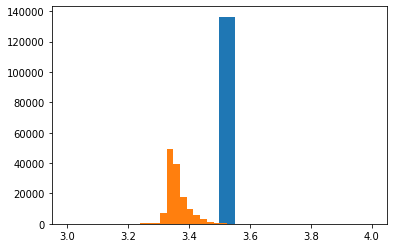

In [26]:
plt.hist(a_reprod_notrain,bins=20)
plt.hist(model.weights[0].numpy(),bins=20)
plt.show()

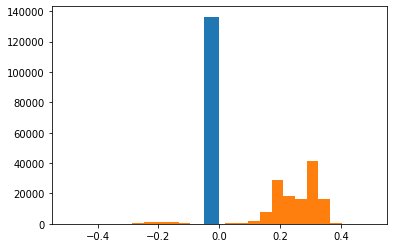

In [27]:

plt.hist(kd_reprod_notrain,bins=20)
plt.hist(model.weights[2].numpy(),bins=20)
plt.show()

In [41]:
a = merged_data_df3['response'].values
b = merged_data_df3['baseline'].values

log10Ka = merged_data_df3['log10Ka'].values
kd_values = (1/10**log10Ka)

In [42]:
a[0], b[0], kd_values[0]

(1.64, 1.13, 1.9054607179632444e-09)

In [43]:
def mean_bin_Bloom(cs, a_Bloom, b_Bloom, kD_WT_Bloom):
    return (a_Bloom * cs)/(cs+kD_WT_Bloom) +b_Bloom

In [44]:
a_reprod = np.squeeze(model.layers[1].get_weights())[0]
b_reprod = np.squeeze(model.layers[1].get_weights())[1]
kd_reprod = np.squeeze(model.layers[1].get_weights())[2]

In [45]:
def mean_bin_reprod(cs, a_reprod, b_reprod, kd_reprod):
    return (a_reprod * cs)/(cs+kd_reprod) +b_reprod

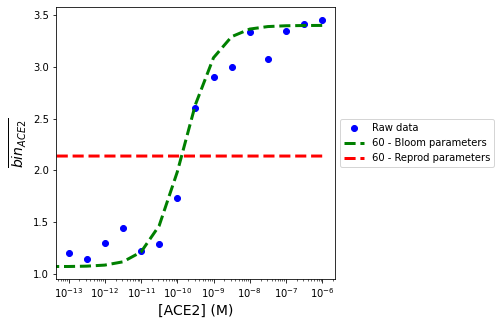

In [46]:
fig, ax = plt.subplots(1,1,figsize=(5,5))


#for idx in np.random.randint(0, high=100000, size=10):
sequence_index = 60



ax.plot(np.array(cs)[::-1],merged_data_df3[merged_data_df3.columns[71:]].loc[sequence_index],'bo',label='Raw data')
ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1],a[sequence_index], b[sequence_index], kd_values[sequence_index]),'--',lw=3,color='green',label=f'{sequence_index} - Bloom parameters')
# ax.plot(np.array(cs)[::-1],merged_data_df3[merged_data_df3.columns[71:]].loc[sequence_index],'o')
# ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1],a[sequence_index], b[sequence_index], kd_values[sequence_index]),'--',lw=3)

ax.plot(np.array(cs)[::-1],mean_bin_reprod(np.array(cs)[::-1],a_reprod[sequence_index], b_reprod[sequence_index], kd_reprod[sequence_index]),'--',lw=3,color='red',label=f'{sequence_index} - Reprod parameters')

ax.set_xlabel('[ACE2] (M)',fontsize=14)
ax.set_ylabel('$\overline{bin_{ACE2}}$',fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')


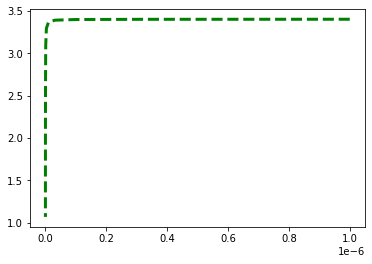

In [34]:
plt.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1],a[sequence_index], b[sequence_index], kd_values[sequence_index]),'--',lw=3,color='green',label=f'{sequence_index} - Bloom parameters')


In [35]:
def func(x, a, b, k):
    return (a * x)/(x+k) + b

In [36]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import least_squares

In [37]:

# def y(x,theta):
#     return (theta[0] * x)/(x+theta[2]) + theta[1]

# xdata

# ydata

# def fun(theta):
#     return y(xdata, theta) - ydata

# theta0 = guess
# res1 = least_squares(fun, theta0,loss='soft_l1')

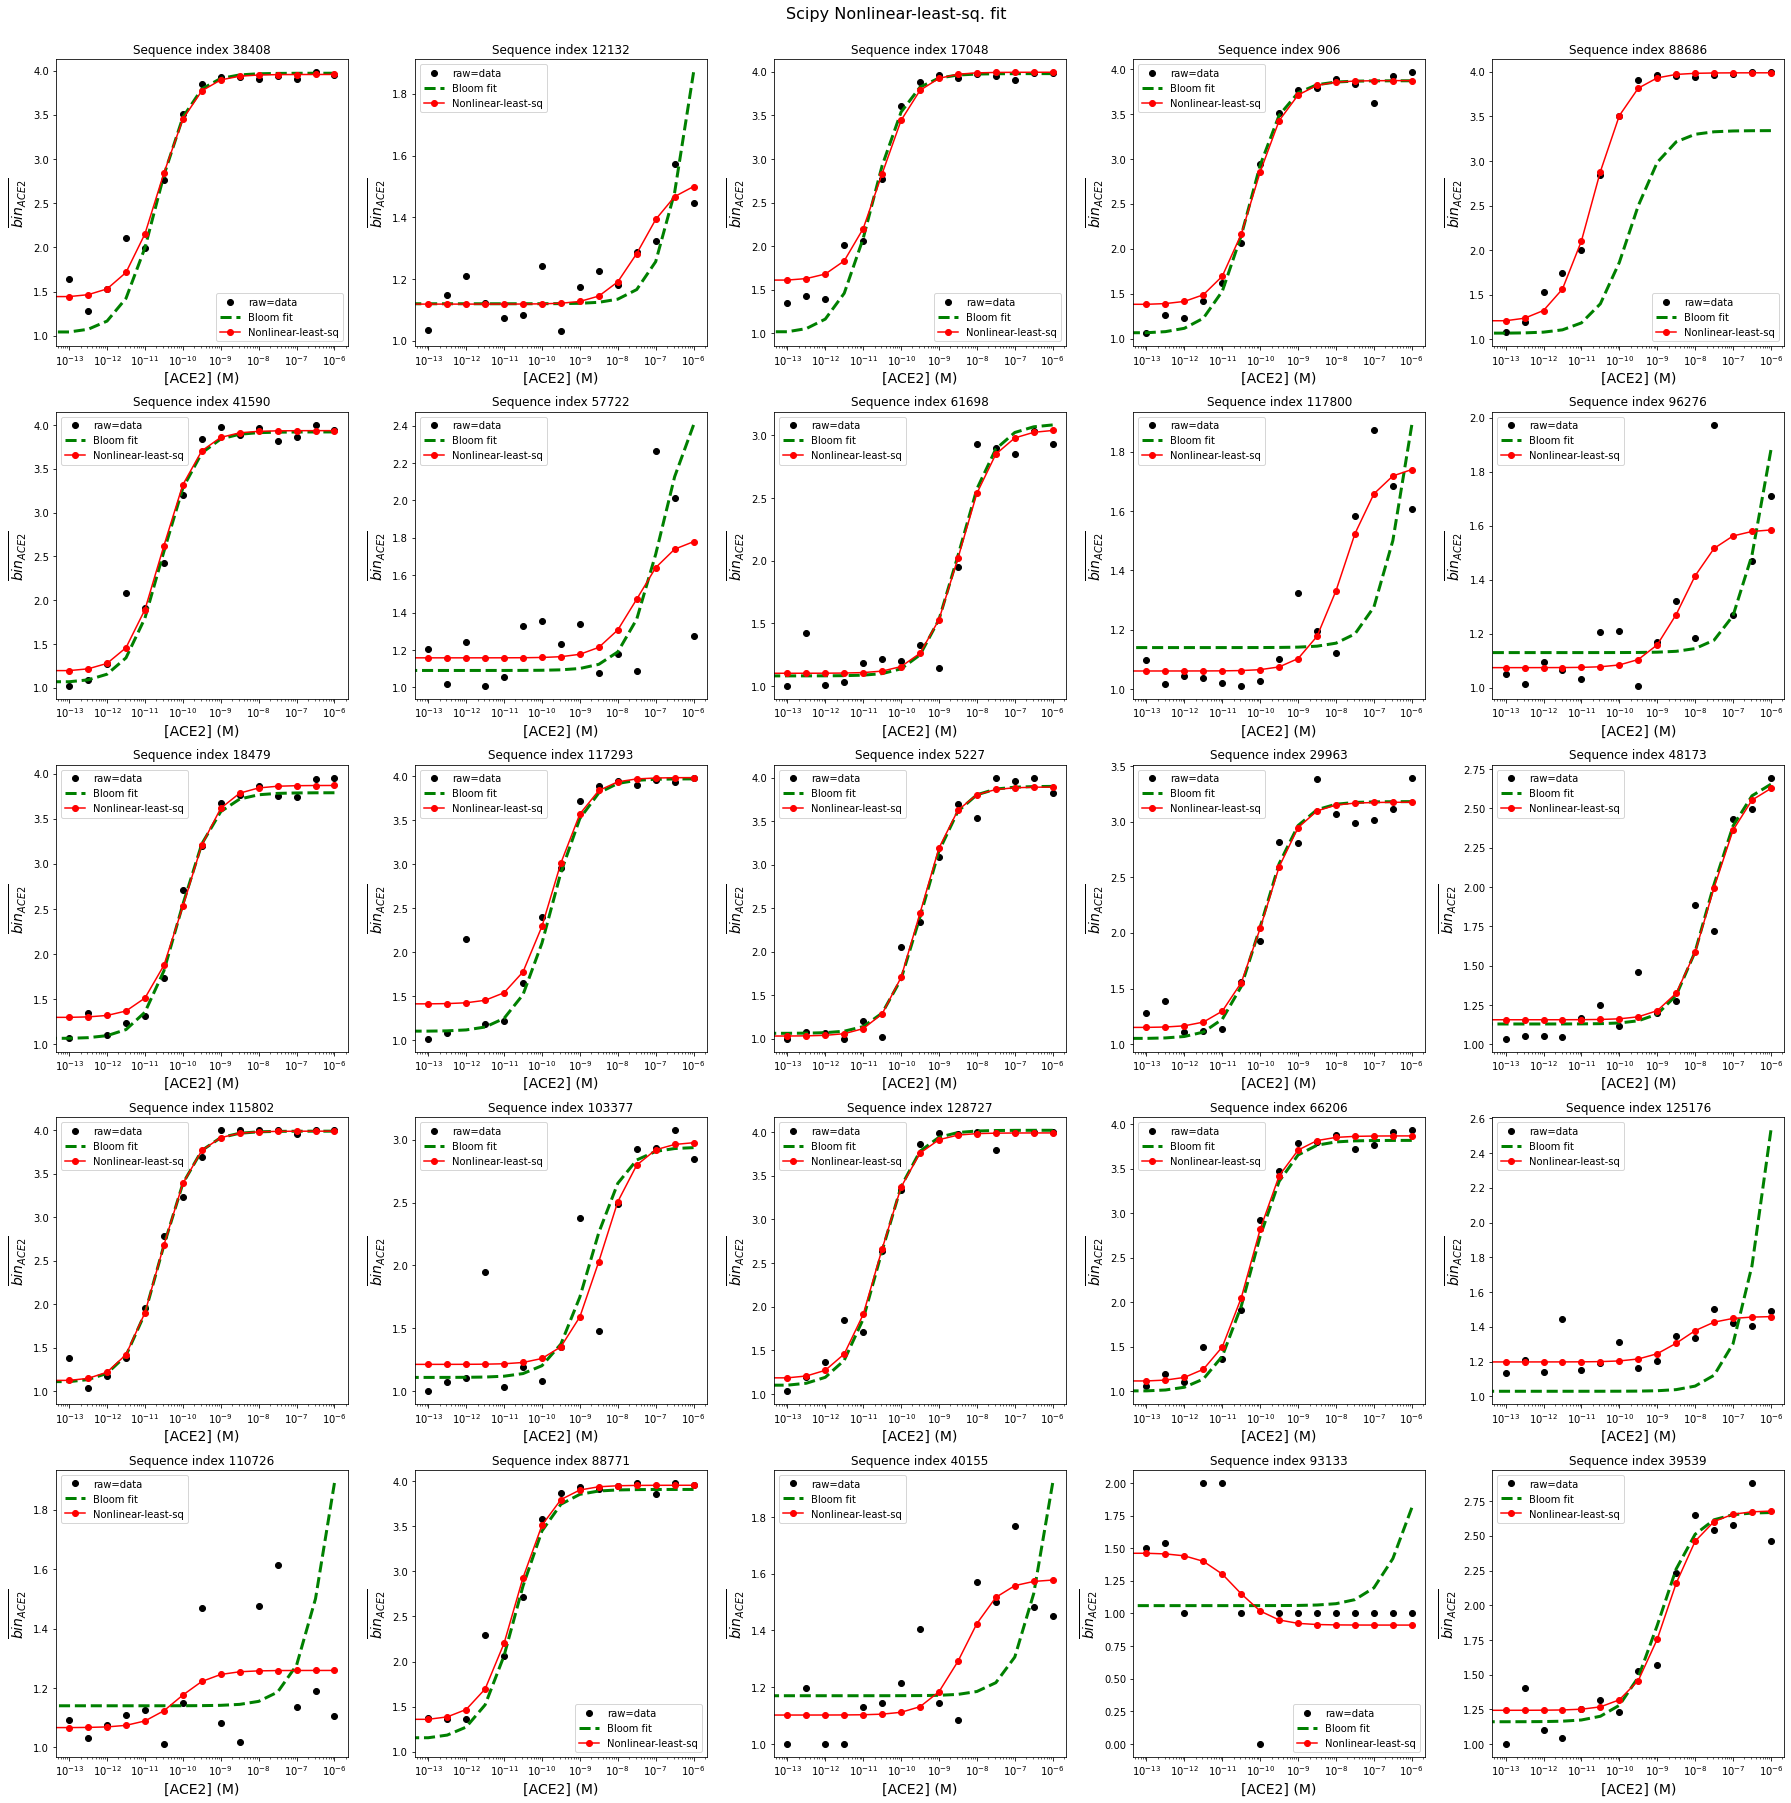

In [40]:
sequence_index = 300
fig, axs = plt.subplots(5,5,figsize=(25,25))
col_idx = 0
row_idx = 0
for idx, sequence_index in enumerate(np.random.randint(0,130000,25)):    
    y_values = merged_data_df3[merged_data_df3.columns[71:]].loc[sequence_index][::-1].values
    
    xdata = np.array(cs)
    ydata = y_values

    guess = [3.5,0.5,10**(-10)]

    popt, pcov = curve_fit(func, xdata, ydata,guess)

    #print(popt)

    #print(row_idx,col_idx)
    
    if col_idx==5:
        col_idx=0
        row_idx+=1

    ax = axs[row_idx,col_idx]
    ax.plot(xdata, ydata, 'o',color='black', label='raw=data')
    ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1],a[sequence_index], b[sequence_index], kd_values[sequence_index]),'--',lw=3,color='green',label=f'Bloom fit')
    #plt.plot(xdata, func(xdata, *popt), 'ro',label='fit-nls')
    ax.plot(xdata, func(xdata, popt[0],popt[1],popt[2]), 'ro-',label='Nonlinear-least-sq')
    #plt.plot(xdata, func(xdata, res1.x[0],res1.x[1],res1.x[2]), 'ro--',label='fit-nls-ls')


    ax.set_xlabel('[ACE2] (M)',fontsize=14)
    ax.set_ylabel('$\overline{bin_{ACE2}}$',fontsize=14)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xscale('log')        
    ax.set_title(f'Sequence index {sequence_index}')

    ax.legend()
    col_idx+=1
    
    
fig.suptitle('Scipy Nonlinear-least-sq. fit',fontsize=16,y=1.0) 
fig.tight_layout()
fig.savefig(f'Titration_curves_check/scipy_nls_fits_25.png',dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


In [39]:

#ydata = y_values
xdata, y_values

(array([0.00000000e+00, 1.00000000e-13, 3.16227766e-13, 1.00000000e-12,
        3.16227766e-12, 1.00000000e-11, 3.16227766e-11, 1.00000000e-10,
        3.16227766e-10, 1.00000000e-09, 3.16227766e-09, 1.00000000e-08,
        3.16227766e-08, 1.00000000e-07, 3.16227766e-07, 1.00000000e-06]),
 array([1.        , 1.28421053, 1.04123711, 1.25925926, 1.55147059,
        1.27777778, 2.28985507, 2.96385542, 3.92105263, 3.75892857,
        3.92      , 3.97938144, 3.98214286, 3.75428571, 3.95238095,
        4.        ]))